In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold #AÑADIDO A DIFERENCIA DEL DE DANI
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import random as rn

import time #agregado por diego
print("Versión de TensorFlow:", tf.__version__)

Versión de TensorFlow: 2.12.0


In [2]:
# Parámetros del modelo
input_shape = (158, 158, 3)  # Tamaño de las imágenes
num_clases = 3  # Número de clases

In [3]:
#listas para almacecnar imagenes y etiquetas
Imagenes=[]
Etiquetas=[]
#tamaño de las imagenes
IMG_TAM = 158
#definicion de los directorios de cada clase
DIR_BASE = 'D:\OneDrive\Documentos\8Semestre\TT2\Imagenes clasificadas'
DIR_ENFERMO_SR = DIR_BASE+'\Enfermo\Stem end Rot'
DIR_ENFERMO_BR = DIR_BASE+'\Enfermo\Body rot'
#DIR_ENFERMO = DIR_BASE+'/Enfermo
DIR_SANO = DIR_BASE+'\Sano'
DIR_SANO_brillo = DIR_BASE+'\Sano\Augmented\\brillo'
DIR_SANO_cs = DIR_BASE + '\Sano\Augmented\channel_shift'
DIR_SANO_flip = DIR_BASE + '\Sano\Augmented\\flip_horizontal'
DIR_SANO_rotacion = DIR_BASE + '\Sano\Augmented\\rotacion'
DIR_SANO_zoom = DIR_BASE + '\Sano\Augmented\zoom'

#Data augmentation
#data augmentation de BR
DIR_ENFERMO_BR_brillo = DIR_BASE + '\Enfermo\Body rot\Augmented\\brillo'
DIR_ENFERMO_BR_cs = DIR_BASE + '\Enfermo\Body rot\Augmented\channel_shift'
DIR_ENFERMO_BR_flip = DIR_BASE + '\Enfermo\Body rot\Augmented\\flip_horizontal'
DIR_ENFERMO_BR_rotacion = DIR_BASE + '\Enfermo\Body rot\Augmented\\rotacion'
DIR_ENFERMO_BR_zoom = DIR_BASE + '\Enfermo\Body rot\Augmented\zoom'

#data augmentation de SER
DIR_ENFERMO_SR_brillo = DIR_BASE + '\Enfermo\Stem end Rot\Augmented\\brillo'
DIR_ENFERMO_SR_cs = DIR_BASE + '\Enfermo\Stem end Rot\Augmented\channel_shift'
DIR_ENFERMO_SR_flip = DIR_BASE + '\Enfermo\Stem end Rot\Augmented\\flip_horizontal'
DIR_ENFERMO_SR_rotacion = DIR_BASE + '\Enfermo\Stem end Rot\Augmented\\rotacion'
DIR_ENFERMO_SR_zoom = DIR_BASE + '\Enfermo\Stem end Rot\Augmented\zoom'

DIR_ENFERMO_SR_IA = DIR_BASE + '\Enfermo\Stem end Rot\AI generated'
DIR_ENFERMO_BR_IA = DIR_BASE + '\Enfermo\Body rot\AI generated'



In [4]:
#funcion para listar las extenciones de archivos en un directorio
def obtener_extension_archivos(DIR):
  ext=[]
  for archivo in os.listdir(DIR):
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    ext.append(ext_archivo)
  extensiones=set(ext)
  print(extensiones)


In [5]:
#validar si un archivo es una imagen en eel  formato permitido
def imagen_valida(archivo,extensiones=[".jpg",".png",".JPG",".PNG",".jfif",".jpeg"]):
  nom_archivo, ext_archivo = os.path.splitext(archivo)
  es_archivo = os.path.isfile(archivo)
  es_imagen = ext_archivo.lower() in extensiones
  return es_archivo and es_imagen

In [6]:
#muestra las extensiones de los archivos en los directorios a trabajar para ver si son válidos
obtener_extension_archivos(DIR_ENFERMO_SR)
obtener_extension_archivos(DIR_ENFERMO_BR)
obtener_extension_archivos(DIR_SANO)


{'', '.jpeg', '.JPG', '.png', '.webp', '.PNG', '.jfif', '.jpg'}
{'', '.jpeg', '.JPG', '.png', '.PNG', '.jfif', '.jpg'}
{'', '.jpeg', '.JPG', '.avif', '.jfif', '.jpg'}


In [7]:
#funcion para cargar umagenes y etiquetas el listas
def construir_base_datos(etiqueta, DIR):
  for archivo in tqdm(os.listdir(DIR)):
    #Construir ruta completa
    ruta = os.path.join(DIR,archivo)
    if imagen_valida(ruta):
      #Carga la imagen en RGB
      img = tf.keras.preprocessing.image.load_img(ruta,color_mode='rgb')
      #Convierte la imagen en una matriz de números
      matriz_img = tf.keras.preprocessing.image.img_to_array(img)
      #Redimenciona la imagen y normaliza la imagen [0 a 1]
      matriz_img = tf.image.resize(matriz_img/255,[IMG_TAM,IMG_TAM])
      #Agrega la matriz (array) a la lista
      Imagenes.append(matriz_img.numpy())
      #Añade la etiqueta a asociada a la imagen
      Etiquetas.append(etiqueta)


In [9]:
#CONSTRUCCION SIN EL DATA AUGMENTATION Y EL AI
clases=['Sano','Enfermo_BODYROT','Enfermo_STEMENDROT']

Etiquetas = []
Imagenes = []

construir_base_datos(0, DIR_SANO)
construir_base_datos(0, DIR_SANO_brillo)
construir_base_datos(0, DIR_SANO_cs)
construir_base_datos(0, DIR_SANO_flip)
construir_base_datos(0, DIR_SANO_rotacion)
#construir_base_datos(0, DIR_SANO_zoom)
print('\n',len(Etiquetas))
construir_base_datos(1, DIR_ENFERMO_BR)
construir_base_datos(1, DIR_ENFERMO_BR_brillo)
construir_base_datos(1, DIR_ENFERMO_BR_cs)
construir_base_datos(1, DIR_ENFERMO_BR_flip)
construir_base_datos(1, DIR_ENFERMO_BR_rotacion)
construir_base_datos(1, DIR_ENFERMO_BR_zoom)
print('\n',len(Etiquetas))
construir_base_datos(2, DIR_ENFERMO_SR)
construir_base_datos(2, DIR_ENFERMO_SR_brillo)
construir_base_datos(2, DIR_ENFERMO_SR_cs)
construir_base_datos(2, DIR_ENFERMO_SR_flip)
construir_base_datos(2, DIR_ENFERMO_SR_rotacion)
construir_base_datos(2, DIR_ENFERMO_SR_zoom)
#construir_base_datos(2, DIR_ENFERMO_SR_IA)
print('\n',len(Etiquetas))

100%|██████████| 60/60 [00:05<00:00, 11.45it/s]



 429


100%|██████████| 52/52 [00:05<00:00, 10.11it/s]



 741


100%|██████████| 66/66 [00:08<00:00,  8.05it/s]


 1137


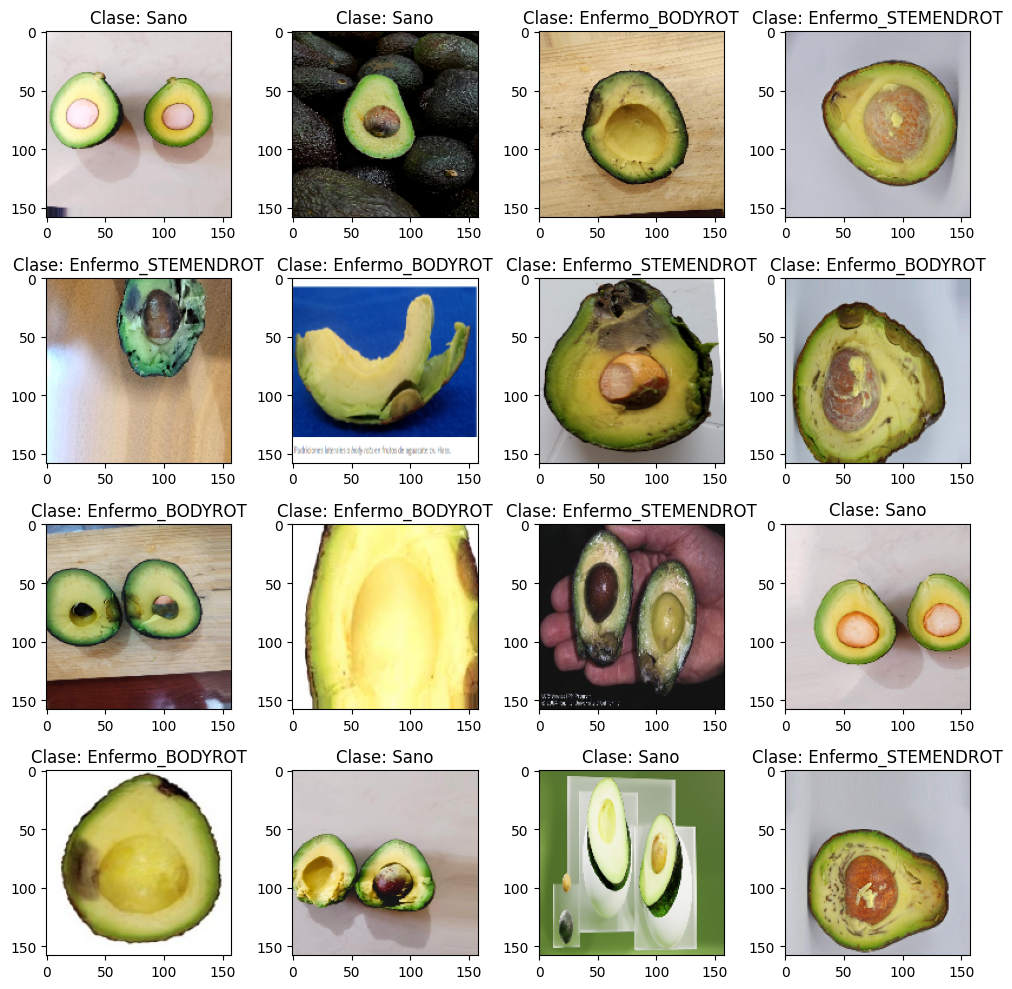

In [10]:
#crea una cuadrícula de subgráficos
fig,ax=plt.subplots(4,4)
#Ajusta el tamaño de la figura
fig.set_size_inches(10,10)
for i in range(4):
    for j in range (4):
        #Selecciona un número aleatorio
        l=rn.randint(0,len(Etiquetas))
        ax[i,j].imshow(Imagenes[l])
        ax[i,j].set_title('Clase: '+clases[Etiquetas[l]])
plt.tight_layout()

In [11]:
#codifica las etiquetas como numeros ESTO ES ONE HOT ENCODING 

#instancia de LabelEncoder, una herramienta de la librería scikit-learn que convierte etiquetas categóricas en números enteros.
codificadorEtiquetas=LabelEncoder()
#Asigna un número entero único a cada clase en Etiquetas
claveEtiquetas=codificadorEtiquetas.fit_transform(Etiquetas)
#Convierte las etiquetas categóricas en vectores one-hot
claveEtiquetas=tf.keras.utils.to_categorical(claveEtiquetas,3)
print(claveEtiquetas)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [12]:
# Convertir listas a arrays para usar en K-Fold SCRIPT EXTRA MIO 
Imagenes = np.array(Imagenes)
Etiquetas = np.array(Etiquetas)

# Configuración de K-Fold Cross Validation
k_folds = 5  # Utilizamos 5 folds para un balance entre validación y rendimiento
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

Tamaño de Imagenes: 1137
Tamaño de Etiquetas: 1137

Entrenando fold 1/5...
Epoch 1/50
29/29 [==============================] - 71s 2s/step - loss: 1.0231 - accuracy: 0.5094 - val_loss: 0.8567 - val_accuracy: 0.5658
Epoch 2/50
29/29 [==============================] - 63s 2s/step - loss: 0.9057 - accuracy: 0.5699 - val_loss: 0.8550 - val_accuracy: 0.6754
Epoch 3/50
29/29 [==============================] - 65s 2s/step - loss: 0.8563 - accuracy: 0.5963 - val_loss: 0.7839 - val_accuracy: 0.6886
Epoch 4/50
29/29 [==============================] - 65s 2s/step - loss: 0.8089 - accuracy: 0.6381 - val_loss: 0.7724 - val_accuracy: 0.6491
Epoch 5/50
29/29 [==============================] - 82s 3s/step - loss: 0.7859 - accuracy: 0.6656 - val_loss: 0.7438 - val_accuracy: 0.7193
Epoch 6/50
29/29 [==============================] - 68s 2s/step - loss: 0.7507 - accuracy: 0.6799 - val_loss: 0.8369 - val_accuracy: 0.6360
Epoch 7/50
29/29 [==============================] - 71s 2s/step - loss: 0.7064 - accu

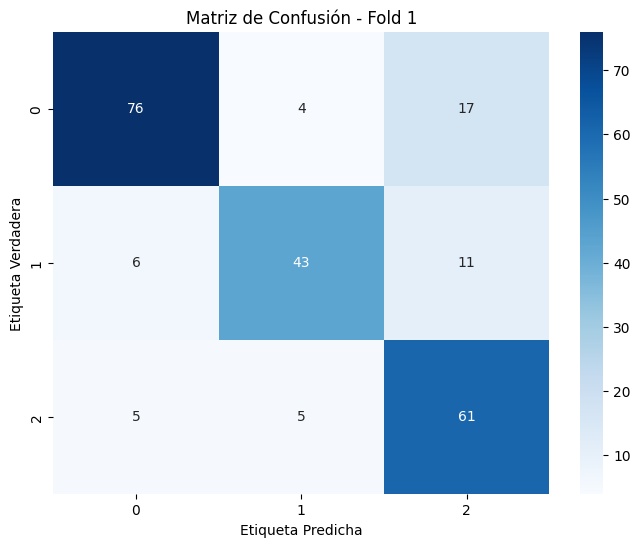


Entrenando fold 2/5...
Epoch 1/50
29/29 [==============================] - 67s 2s/step - loss: 1.0765 - accuracy: 0.4917 - val_loss: 1.0853 - val_accuracy: 0.5088
Epoch 2/50
29/29 [==============================] - 63s 2s/step - loss: 0.8917 - accuracy: 0.6128 - val_loss: 1.0147 - val_accuracy: 0.5614
Epoch 3/50
29/29 [==============================] - 65s 2s/step - loss: 0.8488 - accuracy: 0.6139 - val_loss: 0.9361 - val_accuracy: 0.5702
Epoch 4/50
29/29 [==============================] - 63s 2s/step - loss: 0.7858 - accuracy: 0.6766 - val_loss: 0.8941 - val_accuracy: 0.6228
Epoch 5/50
29/29 [==============================] - 63s 2s/step - loss: 0.7667 - accuracy: 0.6546 - val_loss: 0.9164 - val_accuracy: 0.6360
Epoch 6/50
29/29 [==============================] - 62s 2s/step - loss: 0.7181 - accuracy: 0.7052 - val_loss: 0.8230 - val_accuracy: 0.6535
Epoch 7/50
29/29 [==============================] - 62s 2s/step - loss: 0.6785 - accuracy: 0.7393 - val_loss: 0.8697 - val_accuracy: 0.6

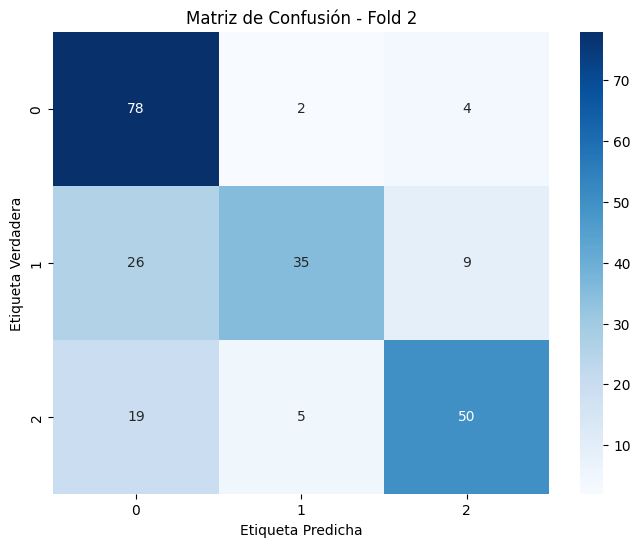


Entrenando fold 3/5...
Epoch 1/50
29/29 [==============================] - 84s 2s/step - loss: 1.1741 - accuracy: 0.4451 - val_loss: 0.9516 - val_accuracy: 0.5639
Epoch 2/50
29/29 [==============================] - 62s 2s/step - loss: 0.8906 - accuracy: 0.6077 - val_loss: 1.2631 - val_accuracy: 0.4934
Epoch 3/50
29/29 [==============================] - 62s 2s/step - loss: 0.9305 - accuracy: 0.5802 - val_loss: 0.9027 - val_accuracy: 0.6344
Epoch 4/50
29/29 [==============================] - 62s 2s/step - loss: 0.8171 - accuracy: 0.6363 - val_loss: 0.8187 - val_accuracy: 0.6432
Epoch 5/50
29/29 [==============================] - 62s 2s/step - loss: 0.7613 - accuracy: 0.6703 - val_loss: 0.7975 - val_accuracy: 0.6564
Epoch 6/50
29/29 [==============================] - 63s 2s/step - loss: 0.7495 - accuracy: 0.6681 - val_loss: 0.8390 - val_accuracy: 0.6300
Epoch 7/50
29/29 [==============================] - 63s 2s/step - loss: 0.7071 - accuracy: 0.7055 - val_loss: 0.7419 - val_accuracy: 0.6

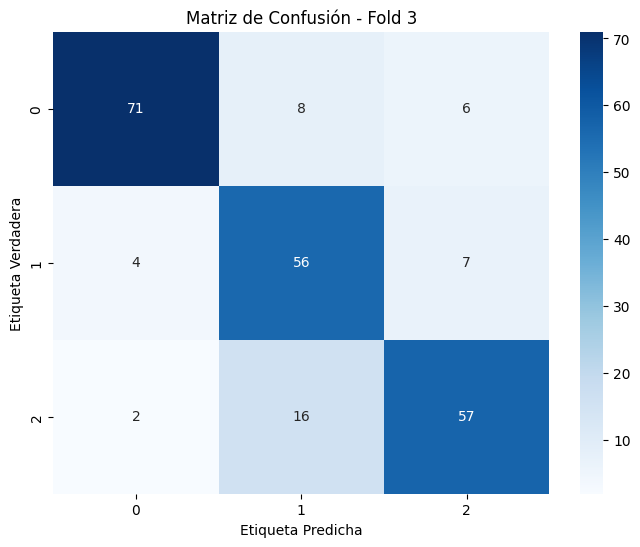


Entrenando fold 4/5...
Epoch 1/50
29/29 [==============================] - 67s 2s/step - loss: 1.1077 - accuracy: 0.4692 - val_loss: 0.9512 - val_accuracy: 0.5022
Epoch 2/50
29/29 [==============================] - 64s 2s/step - loss: 0.8825 - accuracy: 0.6022 - val_loss: 0.8711 - val_accuracy: 0.6256
Epoch 3/50
29/29 [==============================] - 63s 2s/step - loss: 0.8153 - accuracy: 0.6451 - val_loss: 0.8630 - val_accuracy: 0.6211
Epoch 4/50
29/29 [==============================] - 63s 2s/step - loss: 0.7819 - accuracy: 0.6593 - val_loss: 0.9031 - val_accuracy: 0.5771
Epoch 5/50
29/29 [==============================] - 63s 2s/step - loss: 0.7572 - accuracy: 0.6989 - val_loss: 0.9973 - val_accuracy: 0.5419
Epoch 6/50
29/29 [==============================] - 62s 2s/step - loss: 0.7180 - accuracy: 0.6967 - val_loss: 0.7948 - val_accuracy: 0.6740
Epoch 7/50
29/29 [==============================] - 63s 2s/step - loss: 0.7064 - accuracy: 0.7165 - val_loss: 0.7949 - val_accuracy: 0.6

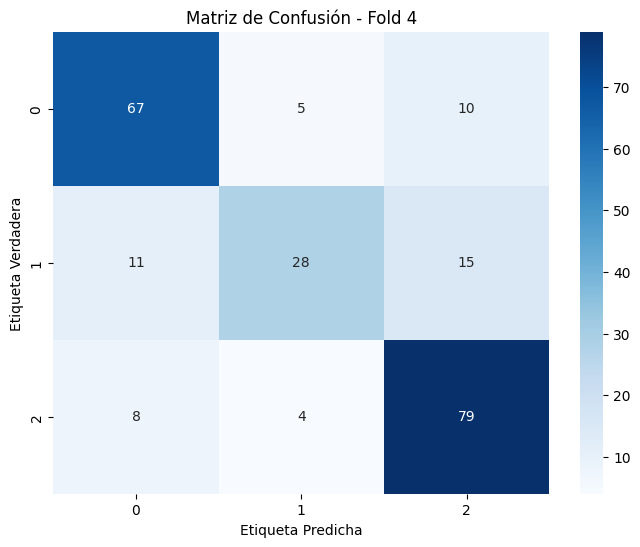


Entrenando fold 5/5...
Epoch 1/50
29/29 [==============================] - 72s 2s/step - loss: 1.1429 - accuracy: 0.4286 - val_loss: 0.9388 - val_accuracy: 0.5991
Epoch 2/50
29/29 [==============================] - 65s 2s/step - loss: 0.9209 - accuracy: 0.5659 - val_loss: 0.8480 - val_accuracy: 0.6123
Epoch 3/50
29/29 [==============================] - 64s 2s/step - loss: 0.8616 - accuracy: 0.6154 - val_loss: 0.8159 - val_accuracy: 0.6476
Epoch 4/50
29/29 [==============================] - 64s 2s/step - loss: 0.8207 - accuracy: 0.6297 - val_loss: 0.8497 - val_accuracy: 0.6035
Epoch 5/50
29/29 [==============================] - 65s 2s/step - loss: 0.7991 - accuracy: 0.6593 - val_loss: 0.7689 - val_accuracy: 0.6608
Epoch 6/50
29/29 [==============================] - 65s 2s/step - loss: 0.7544 - accuracy: 0.6857 - val_loss: 0.8598 - val_accuracy: 0.5639
Epoch 7/50
29/29 [==============================] - 65s 2s/step - loss: 0.8304 - accuracy: 0.6264 - val_loss: 0.7789 - val_accuracy: 0.6

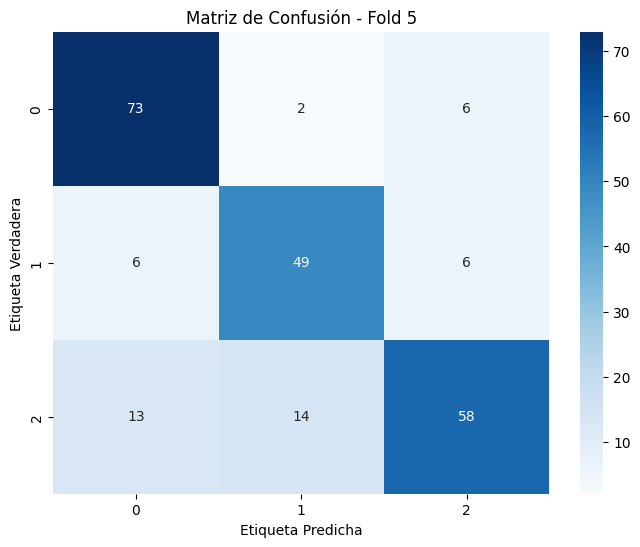


Tiempo total de entrenamiento con K-Fold Cross Validation: 16237.25 segundos

Métricas promedio de los 5 folds:
Precisión promedio: 0.7749
Pérdida promedio: 0.6877

Matriz de Confusión General (sumada de todos los folds)


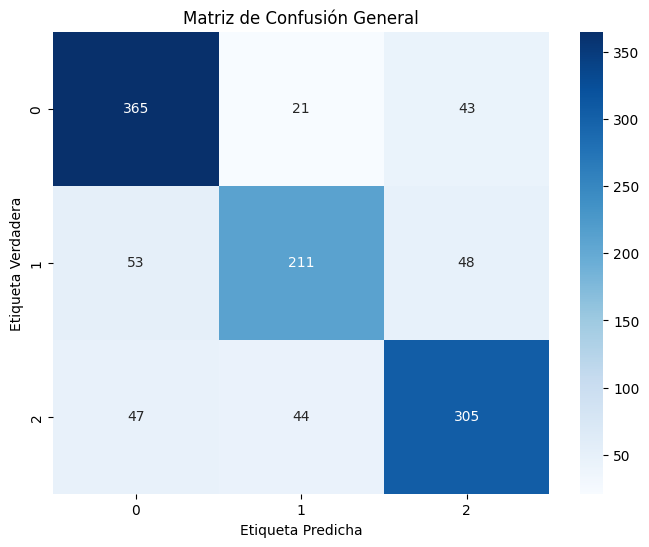

In [13]:
accuracy_scores = []
loss_scores = []
matriz_confusion_general = np.zeros((num_clases, num_clases), dtype=int)
epocas = 50
print("Tamaño de Imagenes:", Imagenes.shape[0])
print("Tamaño de Etiquetas:", Etiquetas.shape[0])
# Medir tiempo de entrenamiento
start_time = time.time()
fold_no = 1
for train_index, val_index in kf.split(Imagenes):
    print(f"\nEntrenando fold {fold_no}/{k_folds}...")

    # Dividir datos en entrenamiento y validación para el fold actual
    img_entrenamiento, img_prueba = Imagenes[train_index], Imagenes[val_index]
    etq_entrenamiento, etq_prueba = Etiquetas[train_index], Etiquetas[val_index]

    # Cargar el modelo base ResNet50
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    #congelar las capas del modelo
    for layer in base_model.layers:
        layer.trainable = False

    # Agregar capas personalizadas
    x = base_model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    predicciones = Dense(num_clases, activation='softmax')(x)

    # Crear el modelo final
    modelo = Model(inputs=base_model.input, outputs=predicciones)
    modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

    # Entrenar el modelo
    history = modelo.fit(img_entrenamiento, etq_entrenamiento,
               validation_data=(img_prueba, etq_prueba),
               epochs=epocas, batch_size=32, verbose=1)

    modelo.save(f'modelo_entrenado_fold{fold_no}.keras')
    
    # Evaluar el modelo en el conjunto de validación
    loss, accuracy = modelo.evaluate(img_prueba, etq_prueba, verbose=0)
    loss_scores.append(loss)
    accuracy_scores.append(accuracy)

    # Generar predicciones en el conjunto de prueba del fold actual
    predicciones = modelo.predict(img_prueba)
    predicciones_etq = np.argmax(predicciones, axis=1)  # Convertir a etiquetas de clase

    # Acumular la matriz de confusión del fold actual
    matriz_confusion_fold = confusion_matrix(etq_prueba, predicciones_etq, labels=range(num_clases))
    matriz_confusion_general += matriz_confusion_fold

    # Mostrar la matriz de confusión del fold actual
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion_fold, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_clases), yticklabels=range(num_clases))
    plt.title(f'Matriz de Confusión - Fold {fold_no}')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.show()

    fold_no += 1
# Calcular y mostrar tiempo total de entrenamiento
end_time = time.time()
total_time = end_time - start_time
print(f"\nTiempo total de entrenamiento con K-Fold Cross Validation: {total_time:.2f} segundos")

#------------------------------------------------------------
# Mostrar métricas finales promediadas
print("\nMétricas promedio de los 5 folds:")
print(f"Precisión promedio: {np.mean(accuracy_scores):.4f}")
print(f"Pérdida promedio: {np.mean(loss_scores):.4f}")

# Mostrar la matriz de confusión general
print("\nMatriz de Confusión General (sumada de todos los folds)")
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_general, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_clases), yticklabels=range(num_clases))
plt.title('Matriz de Confusión General')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Guardar el modelo final (último fold)
modelo.save('modelo_entrenado_final.keras')


In [30]:
#matriz general:
a1 = .74
a2 = 0.67
a3 = 0.64
a4 = 0.68
a5 = 0.70

AC_total = (a1 + a2 + a3 + a4 + a5)/5
print(AC_total)

0.6860000000000002


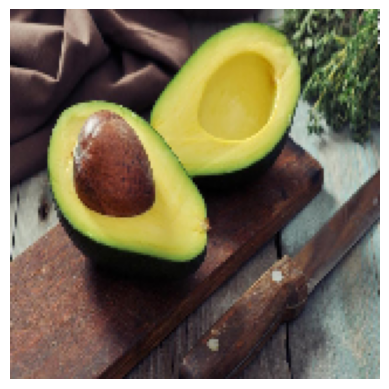

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
La imagen pertenece a la clase: Enfermo_STEMENDROT


In [ ]:
# Definir las clases que estás utilizando
clases = ['Sano', 'Enfermo_BODYROT', 'Enfermo_STEMENDROT']

# Función para predecir una imagen
def predecir_imagen(ruta_imagen, modelo, clases, img_tam=158):
    # Cargar la imagen
    img = tf.keras.preprocessing.image.load_img(ruta_imagen, target_size=(img_tam, img_tam))

    # Mostrar la imagen
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convertir la imagen a un array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Redimensionar y normalizar la imagen
    img_array = np.expand_dims(img_array / 255.0, axis=0)  # Expandir la dimensión para que sea compatible con el modelo

    # Hacer la predicción
    prediccion = modelo.predict(img_array)

    # Obtener la clase predicha
    clase_predicha = np.argmax(prediccion, axis=1)[0]

    # Mostrar el resultado
    print(f"La imagen pertenece a la clase: {clases[clase_predicha]}")

# Ejemplo de uso
ruta_imagen = 'aguacateprueba.jpg'  # Cambiar a la ruta de tu imagen
predecir_imagen(ruta_imagen, modelo, clases)